In [2]:
!pip install scikit-surprise

In [ ]:
goog

## 5.1 surprise 패키지 사용

In [17]:
import numpy as np
from surprise import BaselineOnly, KNNWithMeans, SVD, SVDpp, Dataset, accuracy,Reader
from surprise.model_selection import cross_validate, train_test_split

data = Dataset.load_builtin(name = u'ml-100k')

# train_test 분리
trainset,testset = train_test_split(data, test_size=0.25)

algo = KNNWithMeans()

algo.fit(trainset)

predictions = algo.test(testset)

accuracy.rmse(predictions)

Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9531


0.9530705885680404

## 5.2 알고리즘 비교

Estimating biases using als...
RMSE: 0.9421
Computing the msd similarity matrix...
Done computing similarity matrix.
RMSE: 0.9509
RMSE: 0.9391
RMSE: 0.9243


array([0.92433881, 0.93914863, 0.9421079 , 0.95091125])

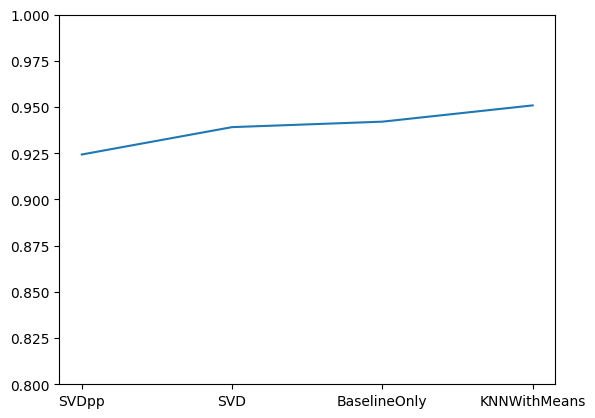

In [20]:
# 비교에 필요한 Surprise 알고리즘
from surprise import BaselineOnly
from surprise import KNNWithMeans
from surprise import SVD
from surprise import SVDpp

# 정확도 측정 관련 모듈
from surprise import accuracy

# Dataset 관련 모듈
from surprise import Dataset

# train/test set 분리 모듈
from surprise.model_selection import train_test_split

# 시각화를 위한 라이브러리
import matplotlib.pyplot as plt

# MovieLens 100K 데이터
data = Dataset.load_builtin(name = u'ml-100k')

# train_test split
trainset, testset = train_test_split(data, test_size=0.25)

algorithms = [BaselineOnly, KNNWithMeans, SVD, SVDpp]

names = []
results = []

for option in algorithms:
    algo = option()
    names.append(option.__name__) # __name__ class의 객체화된 이름을 가져옴
    algo.fit(trainset)
    predictions = algo.test(testset)
    results.append(accuracy.rmse(predictions))
    
names = np.array(names)
results = np.array(results)
index = np.argsort(results)
plt.ylim(0.8,1)
plt.plot(names[index], results[index])
results[index]

## 5.3 알고리즘 옵션 지정

In [21]:
sim_options = {'name':'pearson_baseline',
                'user_based':True} # user based CF 사용함
algo = KNNWithMeans(k=30, sim_options=sim_options)
algo.fit(trainset)
prediction = algo.test(testset)
accuracy.rmse(predictions)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9243


0.9243388063083124

## 5.4 다양한 조건의 비교

In [24]:
# 집단과 사용자의 평가경향을 함께 고려한 CF 알고리즘
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split

data = Dataset.load_builtin(name = u'ml-100k')
trainset, testset = train_test_split(data, test_size=0.25)

result = []

for neighbor_size in (10,20,30,40,50,60):
    algo = KNNWithMeans(k=neighbor_size,
                        sim_options={'name':'pearson_baseline',
                                    'user_based':True})
    algo.fit(trainset)
    prediction = algo.test(testset)
    result.append([neighbor_size, accuracy.rmse(prediction)])

result

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9655
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9538
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9522
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9520
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9521
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
RMSE: 0.9523


[[10, 0.9655409425335372],
 [20, 0.9538121924271781],
 [30, 0.9522058383971719],
 [40, 0.9520093236238049],
 [50, 0.9520537463587418],
 [60, 0.9522958450169134]]

In [25]:
# KNN 다양한 파라미터 비교
# Grid Search를 위한 모듈 가져오기
from surprise.model_selection import GridSearchCV

param_grid = {
    'k':[5,10,15,25],
    'sim_options':{
        'name':['pearson_baseline', 'cosine'],
        'user_based':[True, False]
    }
}

gs = GridSearchCV(KNNWithMeans,
                  param_grid,
                  measures=['rmse'],
                  cv=4)
gs.fit(data)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similar

In [26]:
# 최적 RMSE 출력
print(gs.best_score['rmse'])

# 최적 RMSE의 parameter 출력
print(gs.best_params['rmse'])

0.9253385406555538
{'k': 25, 'sim_options': {'name': 'pearson_baseline', 'user_based': False}}


In [28]:
# SVD 다양한 파라미터 비교
from surprise import SVD
from surprise.model_selection import GridSearchCV

param_grid = {
    'n_epochs' : [70,80,90],
    'lr_all' : [0.005,0.006,0.007],
    'reg_all' : [0.05,0.07,0.01]
}

gs = GridSearchCV(algo_class=SVD,
                    param_grid = param_grid,
                    measures=['rmse'],
                    cv = 4)

gs.fit(data)

print(gs.best_score['rmse'])

print(gs.best_params['rmse'])

0.9180702407673585
{'n_epochs': 70, 'lr_all': 0.005, 'reg_all': 0.07}


## 외부 데이터 사용

In [34]:
import pandas as pd
from surprise import Reader
from surprise import Dataset

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('ml-100k/u.data',
                        names = r_cols,
                        sep = '\t',
                        encoding = 'latin-1')
                        
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(ratings[['user_id','movie_id','rating']], reader)
data